
# Gender Classification Using Machine Learning
#### By John David

## Project Overview
Gender classification is a fundamental task in machine learning with various applications in social media analysis, customer segmentation, and personalized recommendations. This project aims to build a machine learning model to classify gender based on a given dataset.


## Problem statement
The primary goal is to classify individuals into male or female categories based on certain features. These features could include physical attributes, behavioral data, or any other relevant information

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import sklearn

In [2]:
# Loading the dataset
data = pd.read_csv('/content/gender_classification_v7.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
# Description of the data
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
# Shape of the data
print(f'The dataset has, {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has, 5001 rows and 8 columns


## Exploratory Data Analysis

In [6]:
# Removing Dupicate
data.duplicated().sum()

1768

In [7]:
# Removing Duplicates
data.drop_duplicates(inplace=True)

In [8]:
# Checking Duplicates again
data.duplicated().sum()

0

In [9]:
# Gender Count
data['gender'].value_counts()

gender
Male      1783
Female    1450
Name: count, dtype: int64

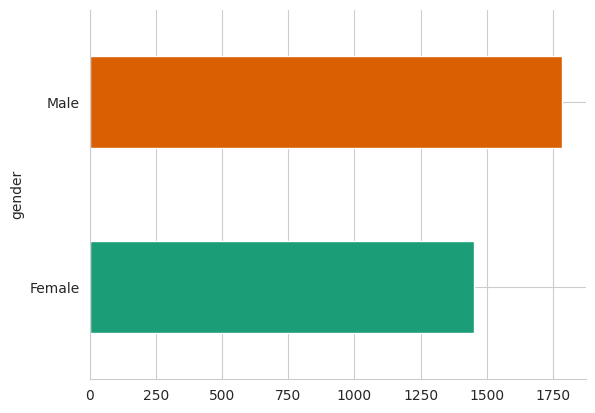

In [33]:
data.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# Percentage of gender in the dataset
gender_count = data['gender'].value_counts()
gender_percent = gender_count / len(data) * 100
print(gender_percent)

gender
Male      55.150015
Female    44.849985
Name: count, dtype: float64


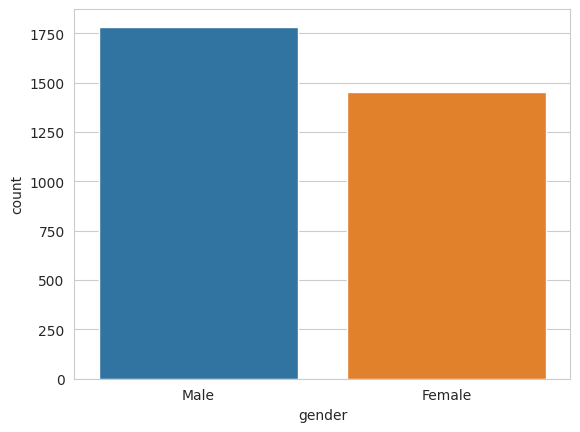

In [11]:
ax = sns.countplot(x='gender',hue='gender', data=data)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


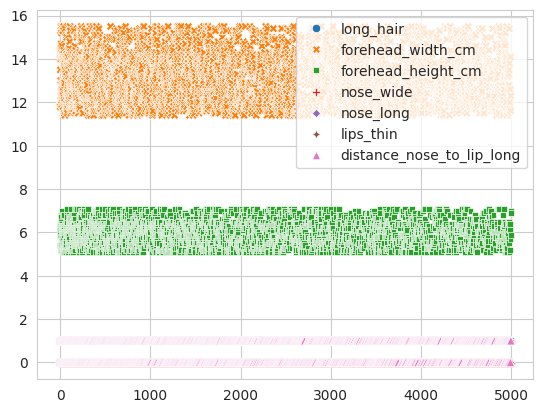

In [12]:
sns.scatterplot(data)

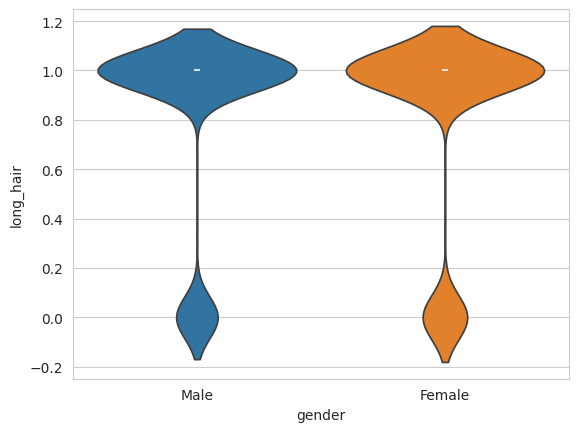

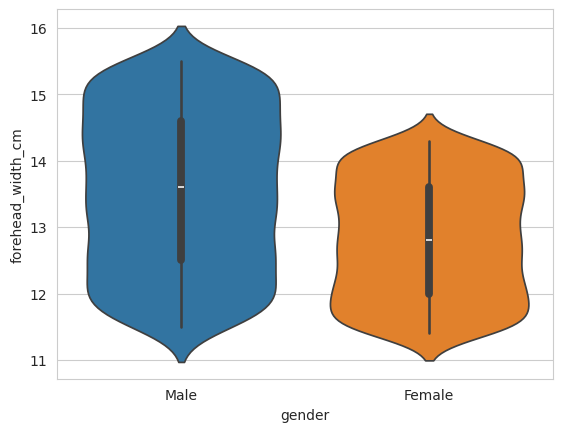

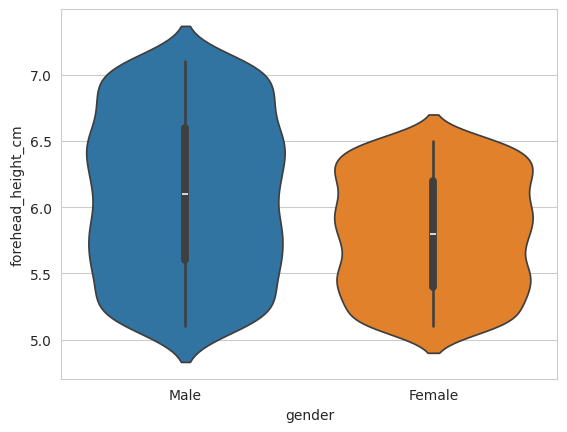

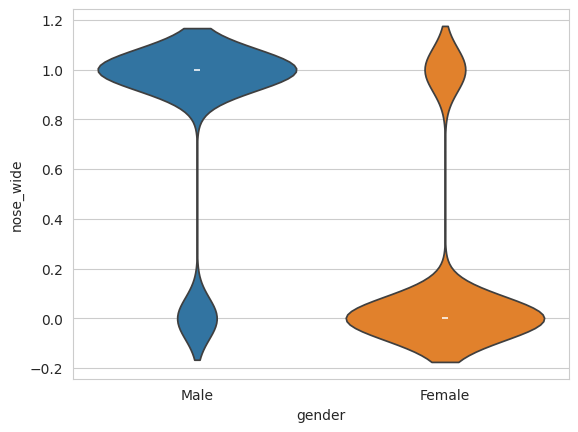

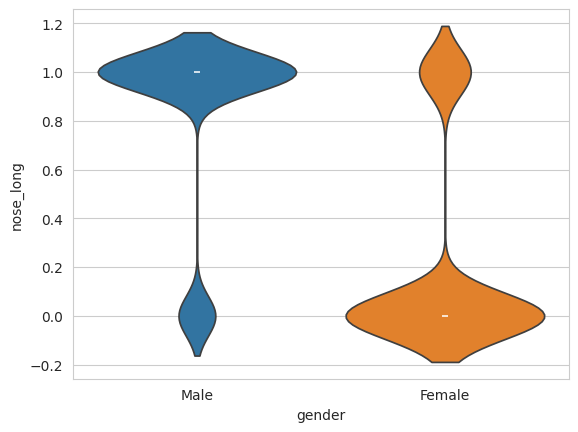

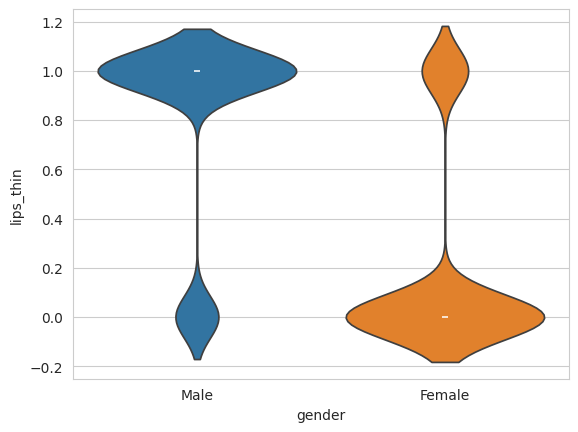

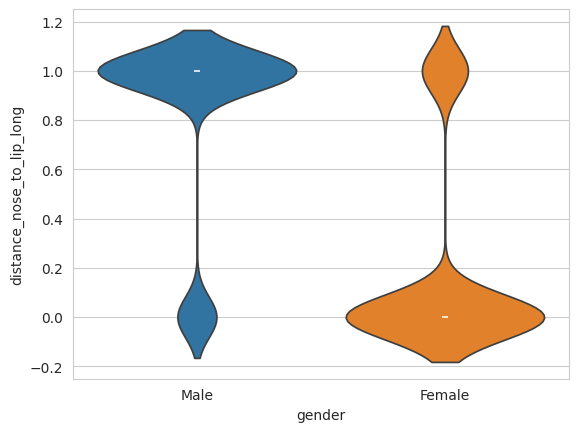

In [13]:
# Getting the list of all columns except for 'gender'
columns = data.columns.tolist()
columns.remove('gender')


for column in columns:
  plt.figure()
  sns.violinplot(x="gender", y=column,hue='gender', data=data)
  plt.show()

**Overall:**

The violin plots show that there are some differences in the distribution of the data between males and females. However, the differences are relatively small and there is a lot of overlap between the two groups. This suggests that gender is not a strong predictor of the values in the dataset.The plot shows that the median value for males is slightly higher than for females.



The distribution for males is also more spread out, indicating that there is more variability in the data for males.


## Splitting the dataset

In [14]:
# Split into X and y
X = data.drop('gender', axis=1)
y = data['gender']

In [15]:
# Spltting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Build

In [16]:
# Importing Logistic Regression and evaluation library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Logistic Regression

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

In [18]:
# Evaluate
print('Accuracy:', round(accuracy_score(y_test, log_pred)*100),"%")
print()
print('Confusion Matrix:\n', confusion_matrix(y_test, log_pred))
print()
print('Classification Report:\n', classification_report(y_test, log_pred))

Accuracy: 96 %

Confusion Matrix:
 [[296  12]
 [ 14 325]]

Classification Report:
               precision    recall  f1-score   support

      Female       0.95      0.96      0.96       308
        Male       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



### Decision Tree Classifier

In [36]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [20]:
# Evaluate
print('Accuracy:', round(accuracy_score(y_test, dtree_pred)*100),"%")
print()
print('Confusion Matrix:\n', confusion_matrix(y_test, dtree_pred))
print()
print('Classification Report:\n', classification_report(y_test, dtree_pred))

Accuracy: 95 %

Confusion Matrix:
 [[292  16]
 [ 17 322]]

Classification Report:
               precision    recall  f1-score   support

      Female       0.94      0.95      0.95       308
        Male       0.95      0.95      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



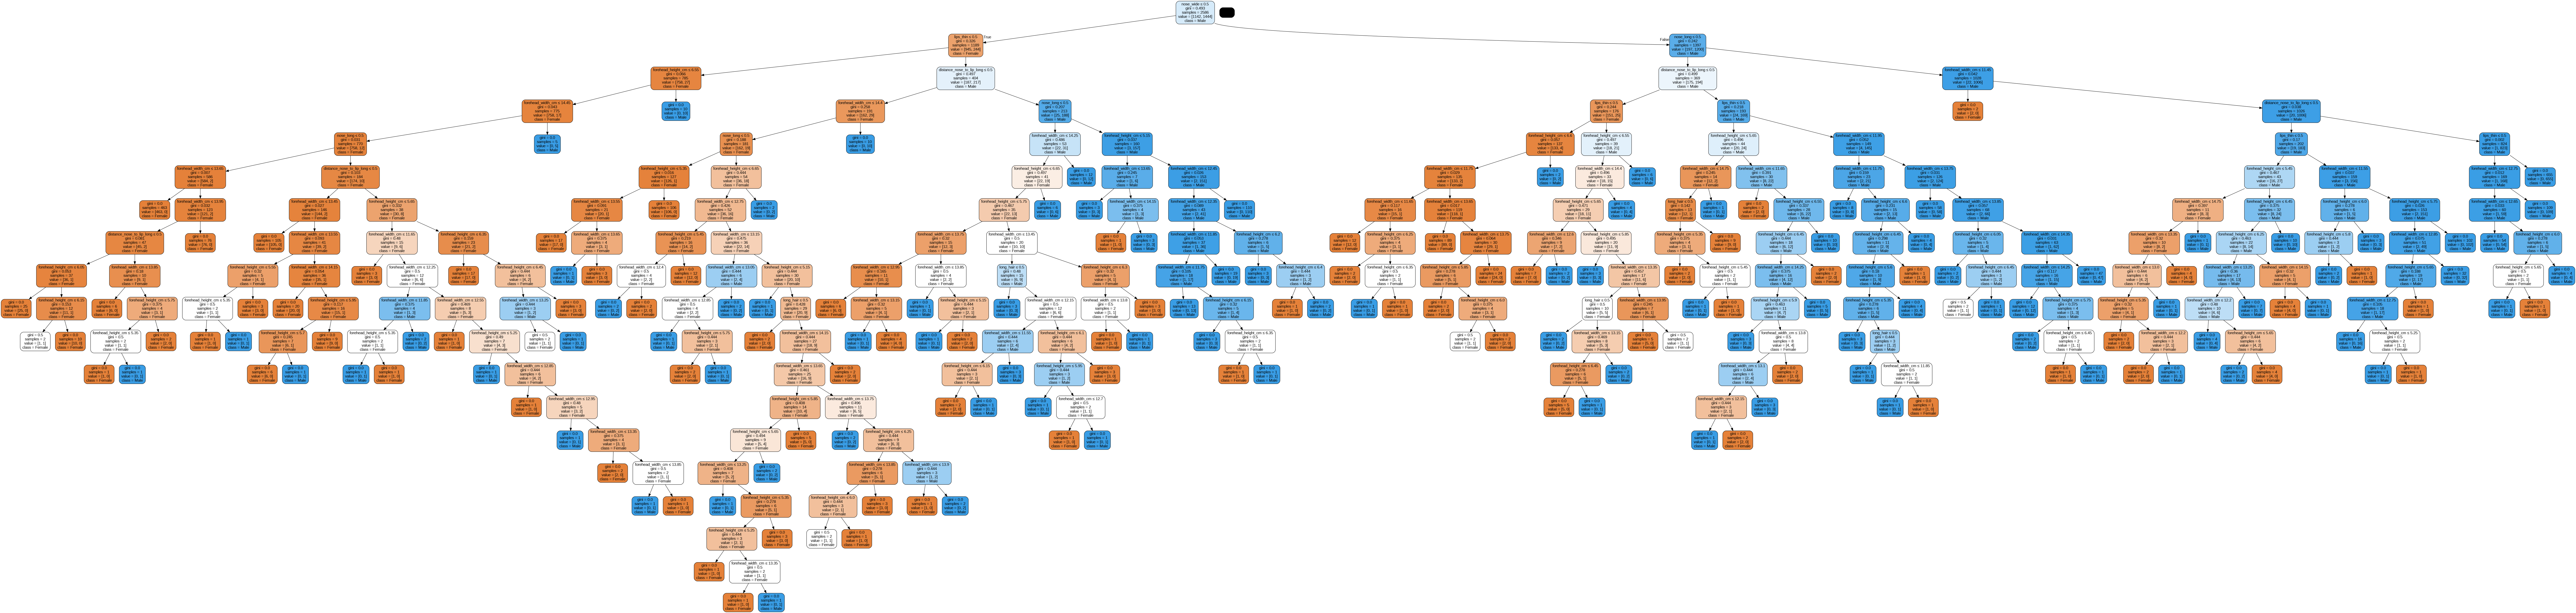

In [21]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns, class_names=['Female','Male'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning for better results
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a new Random Forest model with the best hyperparameters
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)

In [23]:
# Feature importance analysis
feature_importances = best_rfc.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

                     Feature  Importance
5                  lips_thin    0.235917
6  distance_nose_to_lip_long    0.228546
3                  nose_wide    0.220795
4                  nose_long    0.195734
1          forehead_width_cm    0.066693
2         forehead_height_cm    0.051339
0                  long_hair    0.000976


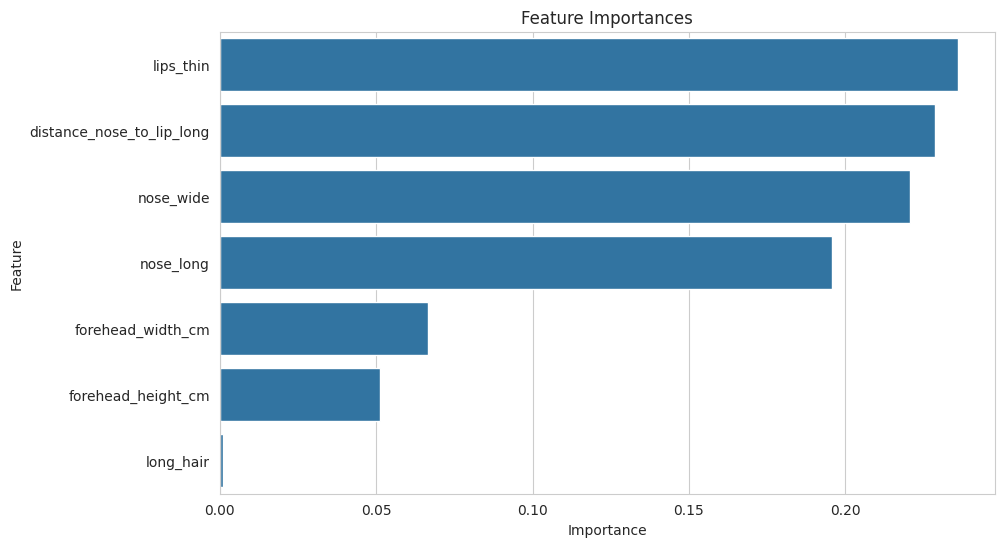

In [24]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

                 Model  Accuracy
0  Logistic Regression     95.98
1        Decision Tree     94.90



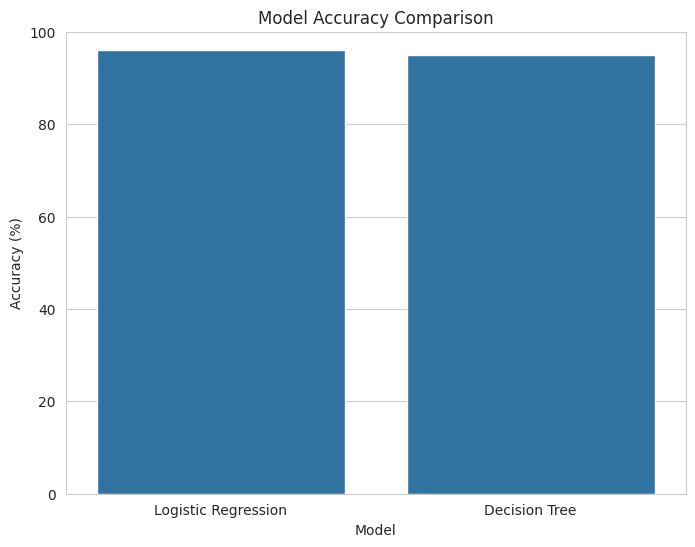

In [32]:
# Creating a dictionary to store the model scores
model_scores = {
    'Model': ['Logistic Regression', 'Decision Tree',],
    'Accuracy': [
        round(accuracy_score(y_test, log_pred) * 100, 2),
        round(accuracy_score(y_test, dtree_pred) * 100, 2),
    ]
}

# Creating a DataFrame from the dictionary
score_df = pd.DataFrame(model_scores)
print(score_df)

print()

# Visualizing score_df
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=score_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

In [39]:
!jupyter nbconvert --to pdf '/content/Gender_Classification (1).ipynb'

[NbConvertApp] Converting notebook /content/Gender_Classification (1).ipynb to pdf
[NbConvertApp] Support files will be in Gender_Classification (1)_files/
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classification (1)_files
[NbConvertApp] Making directory ./Gender_Classificat